In [253]:
#Generic
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import zscore

#Impute
from sklearn.impute import SimpleImputer

#Skewness
from sklearn.preprocessing import PowerTransformer

#Normalize
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Train Test Split
from sklearn.model_selection import train_test_split

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Metrics
from sklearn.metrics import auc,roc_curve,roc_auc_score,accuracy_score,classification_report,confusion_matrix

#Optimize
from sklearn.model_selection import GridSearchCV

#Deep Learning
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [219]:
#Import Data
df=pd.read_excel('train_agriculture.xlsx')

In [220]:
#Check Head
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [221]:
#Check info
df.info()
#There are null values only in Number Weeks Used column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [222]:
#Check stats
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [223]:
#Check column having null values
df['Number_Weeks_Used'].value_counts()

20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63, dtype: int64

In [224]:
#Impute mean in Number_Weeks_Used
si=SimpleImputer()
df['Number_Weeks_Used']=si.fit_transform(df['Number_Weeks_Used'].values.reshape(-1,1))

In [225]:
df.info()
#There are no null values now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4599 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [226]:
df['ID'].nunique()
#As we can see ID for all the rows are unique so we will directly drop it

4599

In [227]:
df=df.drop('ID',axis=1)

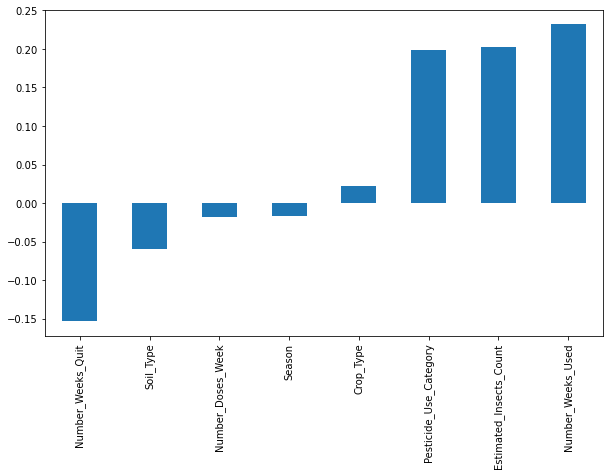

In [228]:
#Check correlation
plt.figure(figsize=(10,6))
df.corr()['Crop_Damage'].drop('Crop_Damage').sort_values(ascending=True).plot(kind='bar')
plt.show()

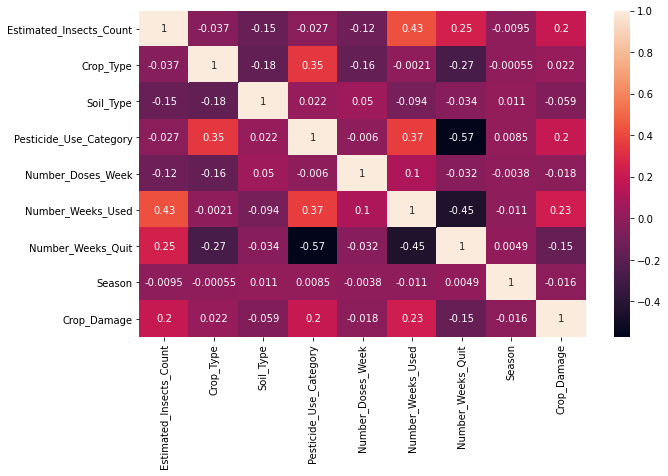

In [229]:
#Check heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

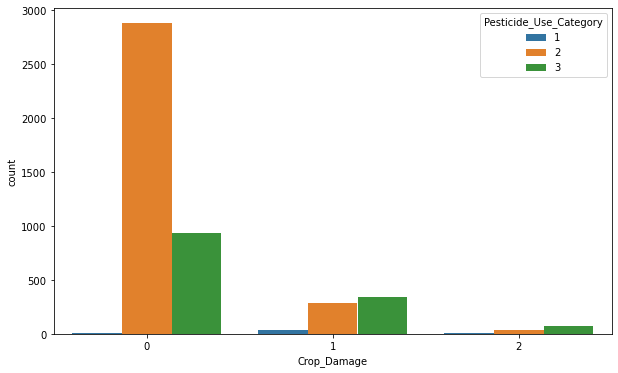

In [230]:
plt.figure(figsize=(10,6))
sns.countplot(x='Crop_Damage',data=df,hue='Pesticide_Use_Category')
plt.show()

In [231]:
#Remove Outliers
df.shape

(4599, 9)

In [232]:
#Remove Outliers
zs=zscore(df)
df=df[((zs<3) & (zs>-3)).all(axis=1)]

In [233]:
df.shape

(4370, 9)

In [234]:
#Check skewness
df.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

In [235]:
pt=PowerTransformer()

In [236]:
for x in df.columns.drop('Crop_Damage'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=np.log1p(df.loc[:,x].values.reshape(-1,1))

In [237]:
df.skew()

Estimated_Insects_Count   -0.543203
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.518158
Number_Doses_Week         -1.181035
Number_Weeks_Used          0.275330
Number_Weeks_Quit         -0.234282
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

In [238]:
#Normalize the data
scale=MinMaxScaler()

In [239]:
X=df.drop('Crop_Damage',axis=1)
y=df['Crop_Damage']

In [240]:
X=scale.fit_transform(X)

In [262]:
def model(mod):
    maxscore=0
    maxstate=0
    for x in range(42,102):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        model=mod
        model.fit(X_train,y_train)
        predict=model.predict(X_test)
        fpr,tpr,thresholds=roc_curve(y_test,predict)
        ac=auc(fpr,tpr)
        acc=accuracy_score(y_test,predict)
        if acc>maxscore:
            maxscore=acc
            maxstate=x
    print('Max score is {} and Max state is {}'.format(maxscore,maxstate))

In [263]:
model(LogisticRegression(max_iter=5000))

Max score is 0.8669438669438669 and Max state is 101


In [264]:
model(KNeighborsClassifier())

Max score is 0.8579348579348579 and Max state is 93


In [265]:
model(SVC())

Max score is 0.8738738738738738 and Max state is 48


In [266]:
model(DecisionTreeClassifier())

Max score is 0.7983367983367984 and Max state is 99


In [267]:
model(RandomForestClassifier())

Max score is 0.8620928620928621 and Max state is 71


In [268]:
model(GaussianNB())

Max score is 0.8565488565488566 and Max state is 93


In [269]:
model(AdaBoostClassifier())

Max score is 0.8745668745668745 and Max state is 80


In [252]:
#With the above results SVC is performning well so we will try to tune Hyperparameters

In [256]:
np.linspace(0,1,10).round(3).tolist()

[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]

In [259]:
param={'C':[0.01,0.05,0.1,0.25,0.50,0.70,1.0]}
gscv=GridSearchCV(SVC(),param)

In [260]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.25, 0.5, 0.7, 1.0]})

In [261]:
gscv.best_params_

{'C': 0.7}

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=48)

In [272]:
model=SVC(C=0.7)
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [274]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[1248    2]
 [ 180   13]]

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1250
           1       0.87      0.07      0.12       193

    accuracy                           0.87      1443
   macro avg       0.87      0.53      0.53      1443
weighted avg       0.87      0.87      0.82      1443



In [285]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,5.241747,0.693147,0,0.693147,0.0,0.0,0.0,1,0
1,5.347108,0.693147,0,0.693147,0.0,0.0,0.0,2,1
2,5.552960,0.693147,0,0.693147,0.0,0.0,0.0,2,1
3,5.552960,0.693147,1,0.693147,0.0,0.0,0.0,2,1
4,5.837730,0.693147,0,0.693147,0.0,0.0,0.0,2,1


In [275]:
#We will test the same model on our test instance

In [281]:
df_test=pd.read_excel('test_agriculture.xlsx')

In [286]:
df_test=df_test.drop('ID',axis=1)

In [287]:
df_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [288]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  1199 non-null   int64  
 1   Crop_Type                1199 non-null   int64  
 2   Soil_Type                1199 non-null   int64  
 3   Pesticide_Use_Category   1199 non-null   int64  
 4   Number_Doses_Week        1199 non-null   int64  
 5   Number_Weeks_Used        1080 non-null   float64
 6   Number_Weeks_Quit        1199 non-null   int64  
 7   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 75.1 KB


In [291]:
si=SimpleImputer()
df_test['Number_Weeks_Used']=si.fit_transform(df_test['Number_Weeks_Used'].values.reshape(-1,1))

In [292]:
df_test=scale.fit_transform(df_test)

In [293]:
predict_test=model.predict(df_test)

In [301]:
predict_test_df=pd.DataFrame(pd.Series(predict_test))

In [302]:
predict_test_df.columns=['predicted values test']

In [306]:
predict_test_df['predicted values test'].value_counts()

0    1179
1      20
Name: predicted values test, dtype: int64